In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import re
import pprint
pp = pprint.PrettyPrinter(indent=2)

In [52]:
with open('profiles.p', 'rb') as f:
    data = pickle.load(f)

In [12]:
len(data)

203

In [13]:
num_exp = list(map(lambda p: len(p['experiences']), data))

In [14]:
np.max(num_exp)

8

In [15]:
np.min(num_exp)

0

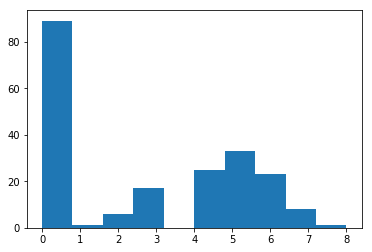

In [16]:
plt.hist(num_exp);

In [45]:
def duration_to_years(duration):
    year_match = re.match('(\d{1,2}) yrs', duration)
    month_match = re.match('(\d{1,2}) mo', duration)
    
    year = 0
    month = 0
    if year_match:
        year = year_match.groups(1)[0]
        year = int(year)
    if month_match:
        month = month_match.groups(1)[0]
        month = int(month)
    
    years = year + month/12
    return years
    
def get_exp_durations(experiences):
    result = []
    for exp in experiences:
        durations = duration_to_years(exp['Employment Duration'])
        result.append(durations)
    return result

get_exp_durations(data[0]['experiences'])

[2.0, 0.0, 0.0]

In [46]:
total_exps = []
for profile in data:
    past_exps = profile['experiences'][:-1]
    years_exp = get_exp_durations(past_exps)
    total_exps.append(np.sum(years_exp))

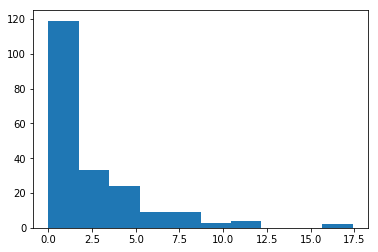

In [47]:
plt.hist(total_exps);

In [65]:
def get_degrees(educations):
    degrees = []
    for edu in educations:
        if not 'Degree Name' in edu:
#             pp.pprint(edu)
            continue
        dn = edu['Degree Name']
        dn = dn.replace('.', '')
        dn = dn.lower()
        degrees.append(dn)
    return degrees

get_degrees(data[0]['educations'])

['ba']

In [68]:
degrees = []
for profile in data:
    ds = get_degrees(profile['educations'])
    degrees.append(len(ds))

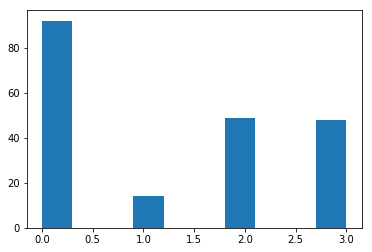

In [71]:
plt.hist(degrees);